<a href="https://colab.research.google.com/github/AngelB26/ICTAK/blob/main/Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('/content/credit_card_default.csv')

In [5]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.553667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.518326,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [9]:
#checking for missing values
data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [10]:
data.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_1                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [11]:
x = data.drop(['ID','default payment next month'],axis = 1)
y = data['default payment next month']

In [ ]:
#scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
mn = MinMaxScaler()

In [14]:
x.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [15]:
x.loc[:,[ 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']] = mn.fit_transform(x[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']])

<ipython-input-15-aec283b91aaf>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.loc[:,[ 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',


In [16]:
x.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.010101,1.0,0.333333,0.0,0.051724,0.4,0.4,0.1,0.1,0.0,...,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,0.111111,1.0,0.333333,0.5,0.086207,0.1,0.4,0.2,0.2,0.2,...,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,0.080808,1.0,0.333333,0.5,0.224138,0.2,0.2,0.2,0.2,0.2,...,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,0.040404,1.0,0.333333,0.0,0.275862,0.2,0.2,0.2,0.2,0.2,...,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,0.040404,0.0,0.333333,0.0,0.620690,0.1,0.2,0.1,0.2,0.2,...,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
#knn

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [20]:
metric_k = []
neighbors = np.arange(3,15)

for k in neighbors :
  classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski' , p = 2)
  classifier.fit(x_train,y_train)
  y_pred_knn = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred_knn)
  metric_k.append(acc)

In [21]:
metric_k

[0.7790666666666667,
 0.8002666666666667,
 0.7950666666666667,
 0.8036,
 0.7994666666666667,
 0.8016,
 0.8036,
 0.8050666666666667,
 0.8068,
 0.8084,
 0.8098666666666666,
 0.8093333333333333]

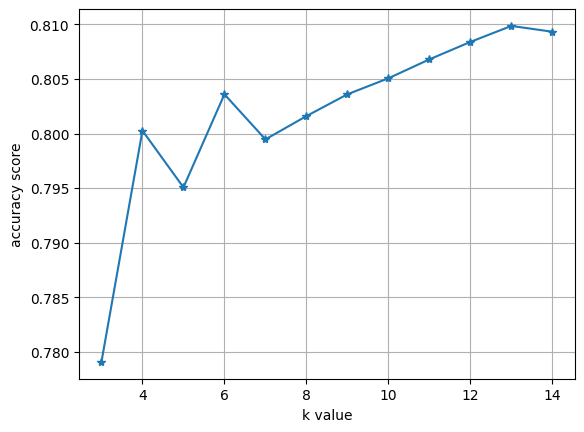

In [22]:
plt.plot(neighbors,metric_k,'*-')
plt.xlabel('k value')
plt.ylabel('accuracy score')
plt.grid()
plt.show()

In [ ]:

#now make model using k=9

In [23]:
classifier=KNeighborsClassifier(n_neighbors=9,metric='minkowski',p=2)#p=1 manhattan,p=2 euclidean based
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [24]:
y_pred_knn=classifier.predict(x_test)

In [25]:
confusion_matrix(y_test,y_pred_knn)

array([[5499,  374],
       [1099,  528]])

In [26]:
accuracy_score(y_test,y_pred_knn)

0.8036

In [ ]:
#SVM

In [27]:
from sklearn.svm import SVC

In [28]:
sv = SVC(kernel = 'linear')

In [29]:
sv.fit(x_train,y_train)

SVC(kernel='linear')

In [30]:
y_pred = sv.predict(x_test)

In [31]:
accuracy_score(y_test,y_pred)

0.8089333333333333

In [32]:
sv1 = SVC(kernel = 'poly',degree = 3)

In [33]:
sv1.fit(x_train,y_train)
y_pred1 = sv1.predict(x_test)

In [34]:
accuracy_score(y_test,y_pred1)

0.8189333333333333

In [35]:
sv2 = SVC(kernel = 'rbf')
sv2.fit(x_train,y_train)
y_pred2 = sv2.predict(x_test)
print(accuracy_score(y_test,y_pred2))

0.8161333333333334


In [ ]:
#adaboost classifier

In [36]:
from sklearn.ensemble import AdaBoostClassifier

In [37]:
ada_boost_clf = AdaBoostClassifier(n_estimators= 100)

In [38]:
ada_boost_clf.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [39]:
y_pred_ada = ada_boost_clf.predict(x_test)

In [40]:
accuracy_score(y_test,y_pred_ada)

0.816

In [ ]:
#gradient boost

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

In [42]:
grad_boost_clf = GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=42)

In [43]:
grad_boost_clf.fit(x_test,y_test)

GradientBoostingClassifier(random_state=42)

In [44]:
y_pred_grad = grad_boost_clf.predict(x_test)

In [45]:
accuracy_score(y_test,y_pred_grad)

0.8354666666666667

In [45]:
#xgboost

In [46]:
import xgboost as xgb

In [47]:
xg_boost_clf = xgb.XGBClassifier()

In [48]:
xg_boost_clf.fit(x_test,y_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [49]:
y_pred_xgb = xg_boost_clf.predict(x_test)

In [50]:
accuracy_score(y_test,y_pred_xgb)

0.9537333333333333

In [ ]:
#kfold cross validation

In [51]:
from sklearn.model_selection import cross_val_score,KFold
model1 = xgb.XGBClassifier()
kf = KFold(n_splits = 10)

In [52]:
score = cross_val_score(model1,x,y,cv = kf)

In [53]:
print(score)

[0.80333333 0.81       0.80666667 0.801      0.805      0.806
 0.83066667 0.83966667 0.83833333 0.81966667]


In [54]:
print('average cross validation score = ',score.mean())

average cross validation score =  0.8160333333333334


In [55]:
model2 = GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=42)
kf1 = KFold(n_splits = 10)

In [56]:
score1 = cross_val_score(model2,x,y,cv = kf1)

In [57]:
print(score1)

[0.80666667 0.811      0.80833333 0.804      0.81733333 0.81833333
 0.833      0.85       0.84133333 0.825     ]


In [58]:
print('average cross validation score = ',score1.mean())

average cross validation score =  0.8215


In [59]:
model3 =  AdaBoostClassifier(n_estimators= 100)
kf2 = KFold(n_splits = 10)

In [60]:
score2 = cross_val_score(model3,x,y,cv = kf2)

In [61]:
print(score2)

[0.80366667 0.81233333 0.802      0.802      0.814      0.81166667
 0.82366667 0.84       0.837      0.82166667]


In [62]:
print('average cross validation score = ',score2.mean())

average cross validation score =  0.8168000000000001


In [63]:
model4 = SVC()
kf = KFold(n_splits = 10)

In [ ]:
score3 = cross_val_score(model4,x,y,cv = kf)

In [ ]:
print(score3)

In [ ]:
print('average cross validation score = ',score3.mean())

In [ ]:
#stratified cross validation

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
skfold = StratifiedKFold(n_splits = 10)

In [ ]:
skfold_score = cross_val_score(xg_boost_clf,x,y,cv = skfold)

In [ ]:
skfold_score

In [ ]:
print('Average SKFold score =',skfold_score.mean())

In [ ]:
#hyperparameter tuning

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
max_depth = [1,2,3,4,5,6,7,8,9,10]

In [ ]:
for val in max_depth:
  score = cross_val_score(DecisionTreeClassifier(max_depth = val),x,y,cv=kf,scoring = 'accuracy')
  print('avg score = ',score.mean())

In [ ]:
parameters = {'max_depth':[10,20,30,40,50,60,70,80,90,100],
              'criterion':['gini','entropy']}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
parameters= {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': np.linspace(0.8, 1.0, 5)
}

In [ ]:
random_search = RandomizedSearchCV(GradientBoostingClassifier(),
                                 param_distributions= parameters,
                                 n_iter=5,scoring='accuracy',
                                 n_jobs=-1,
                                 cv=5,
                                 verbose=3)
random_search.fit(x_train,y_train)
print('Best Params :',random_search.bestparams)
print('Best Score :',random_search.bestscore)